# Single game analysis: Fused graph
# Fragility computation

## Version 11/10/2024

## Marc Barthelemy



Processing file: ./data/test_folder1/ivanchuk_jussupow_1991.pgn
Maximum fragility occurs at ply: 24
Move at maximum fragility: e4e3
Piece that made the move: p
Key piece under attack: P
Fragility before the move: 1.103030303030303
Fragility after the move: 2.4136363636363636


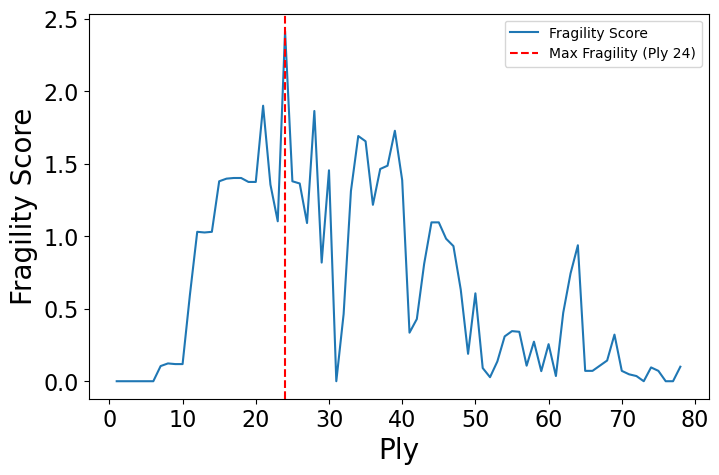

Displaying the state **after** the move causing maximum fragility:


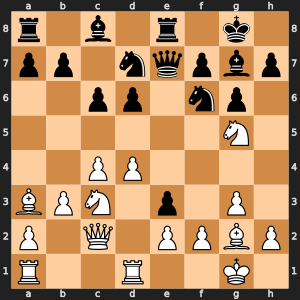

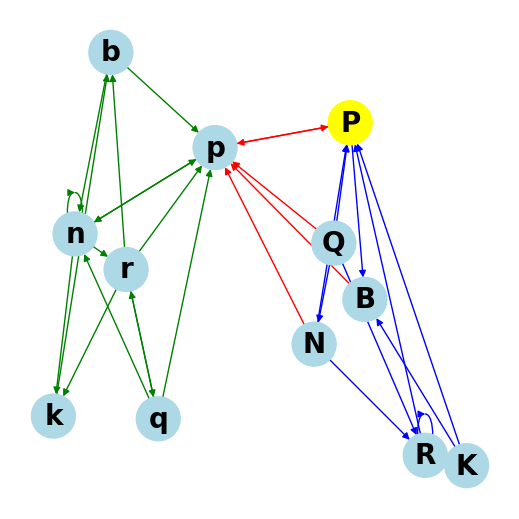

Processing file: ./data/test_folder1/short_timman_1991.pgn
Maximum fragility occurs at ply: 63
Move at maximum fragility: h2g3
Piece that made the move: K
Key piece under attack: P
Fragility before the move: 2.5277777777777777
Fragility after the move: 2.6111111111111107


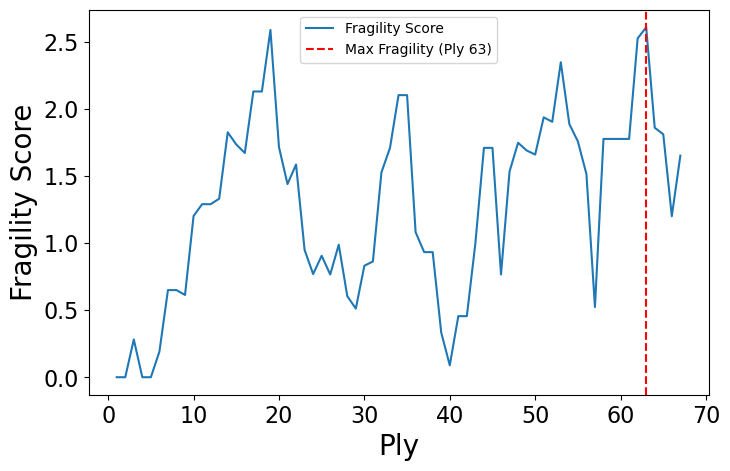

Displaying the state **after** the move causing maximum fragility:


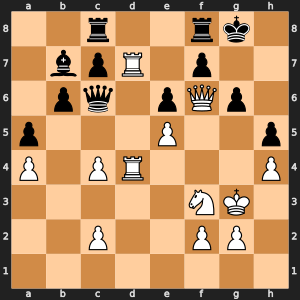

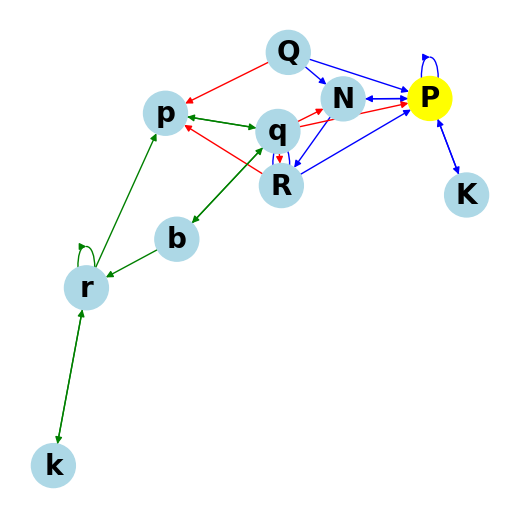

Processing file: ./data/test_folder1/karpov_kasparov_1985.pgn
Maximum fragility occurs at ply: 38
Move at maximum fragility: c5d6
Piece that made the move: b
Key piece under attack: P
Fragility before the move: 2.1045454545454545
Fragility after the move: 2.6151515151515152


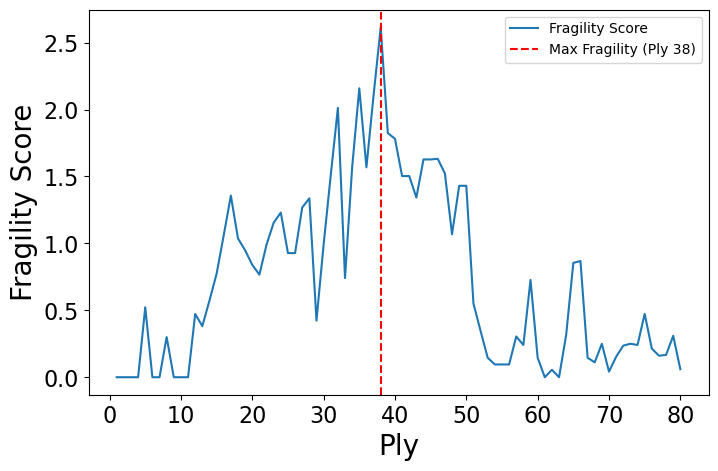

Displaying the state **after** the move causing maximum fragility:


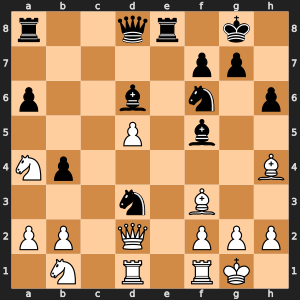

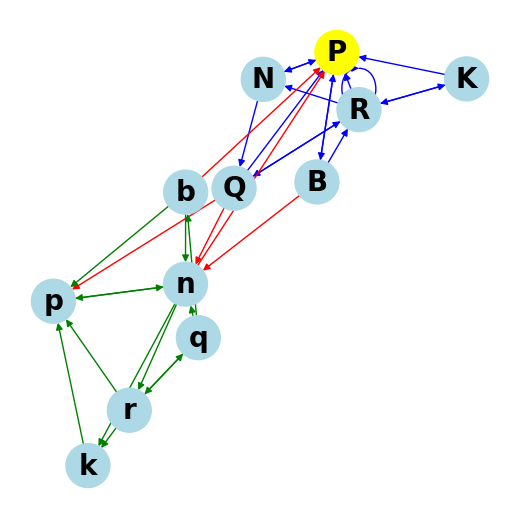

Processing file: ./data/test_folder1/kasparov_topalov_1999.pgn
Maximum fragility occurs at ply: 50
Move at maximum fragility: a7b6
Piece that made the move: k
Key piece under attack: P
Fragility before the move: 0.736111111111111
Fragility after the move: 2.246363636363636


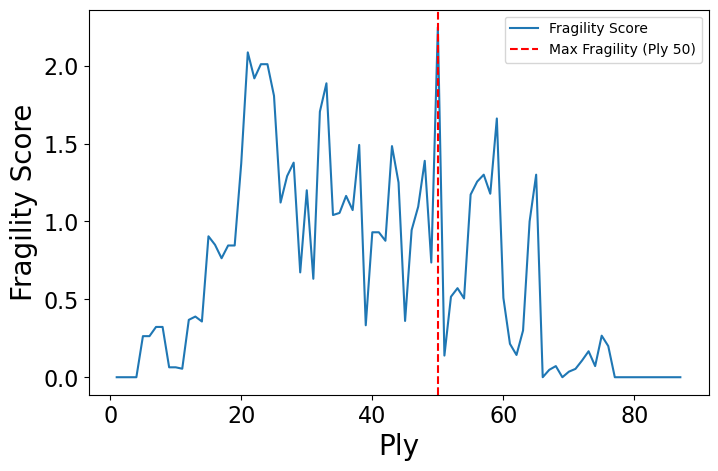

Displaying the state **after** the move causing maximum fragility:


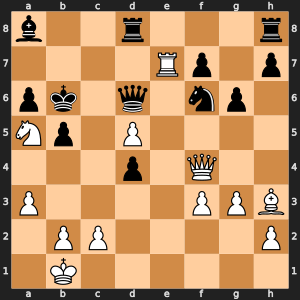

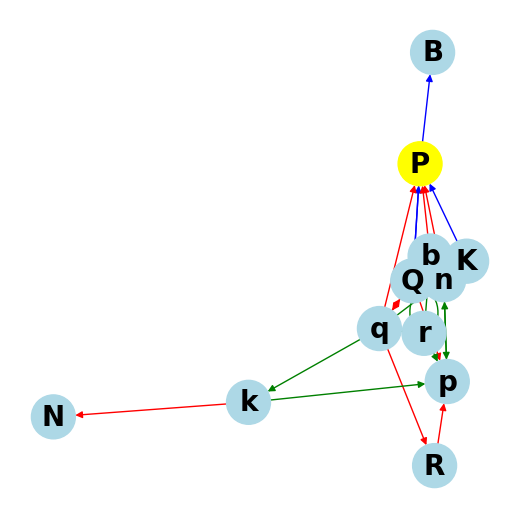

Processing file: ./data/test_folder1/bai_ding_liren_2017.pgn
Maximum fragility occurs at ply: 45
Move at maximum fragility: f3g3
Piece that made the move: K
Key piece under attack: P
Fragility before the move: 0.6333333333333333
Fragility after the move: 1.9930555555555554


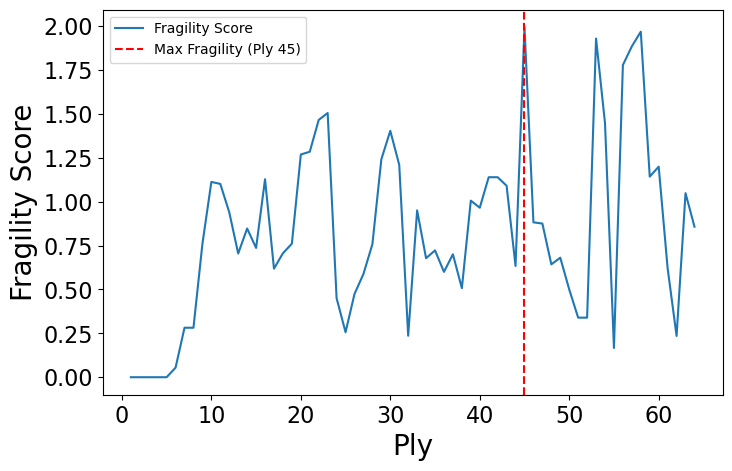

Displaying the state **after** the move causing maximum fragility:


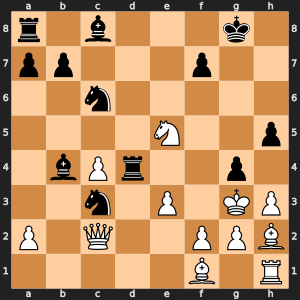

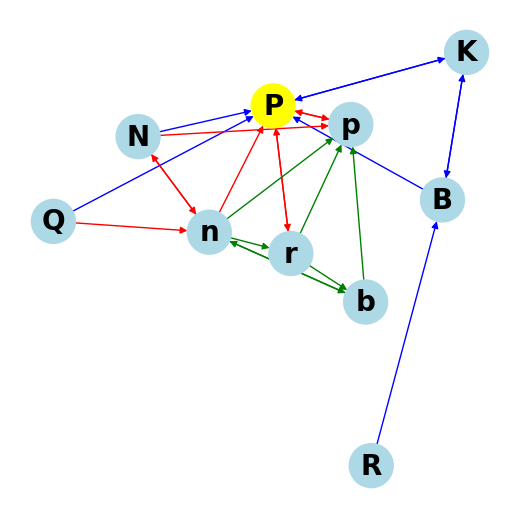

Processing file: ./data/test_folder1/aronian_anand_2013.pgn
Maximum fragility occurs at ply: 33
Move at maximum fragility: e2g4
Piece that made the move: B
Key piece under attack: P
Fragility before the move: 1.6636363636363636
Fragility after the move: 1.809848484848485


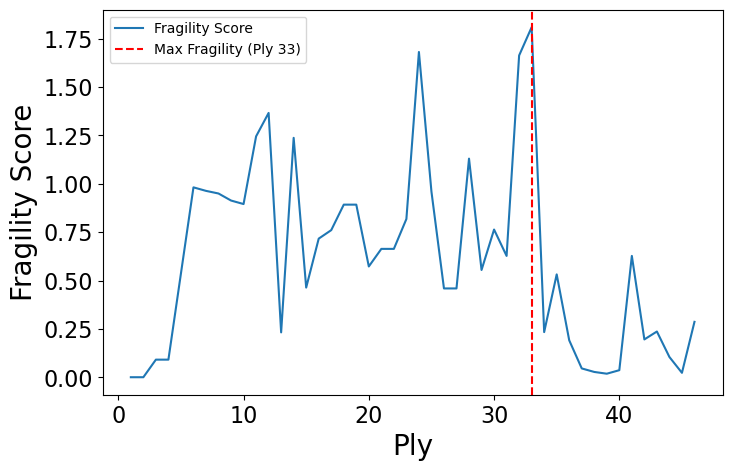

Displaying the state **after** the move causing maximum fragility:


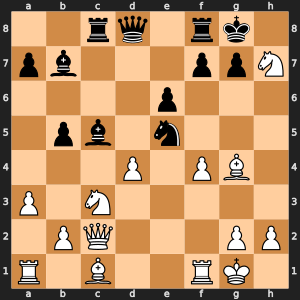

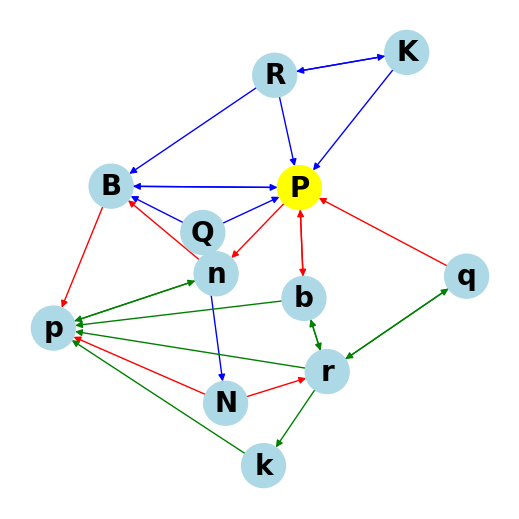

Processing file: ./data/test_folder1/vanforrest.pgn
Maximum fragility occurs at ply: 49
Move at maximum fragility: b5d4
Piece that made the move: N
Key piece under attack: N
Fragility before the move: 0.7515151515151515
Fragility after the move: 1.4939393939393937


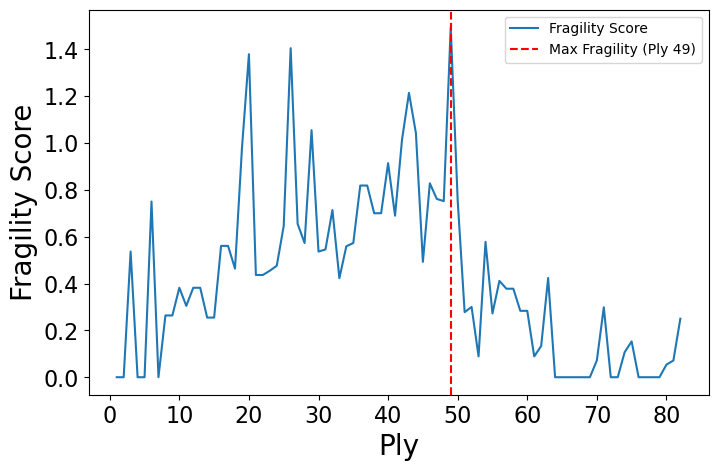

Displaying the state **after** the move causing maximum fragility:


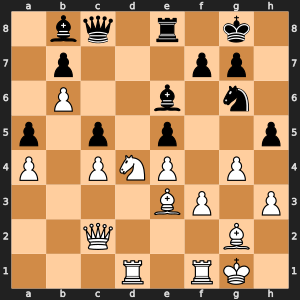

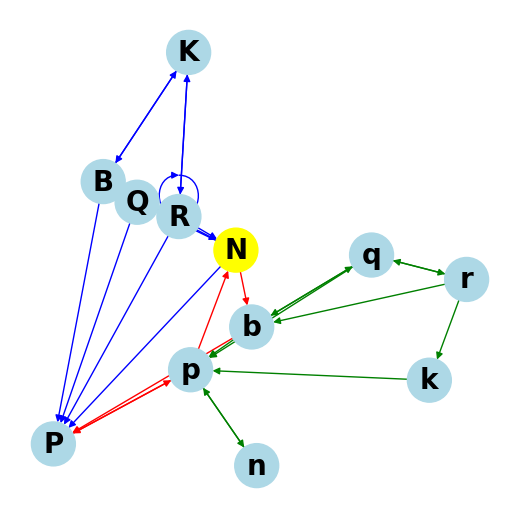

Processing file: ./data/test_folder1/carlsen_giri_2022.pgn
Maximum fragility occurs at ply: 31
Move at maximum fragility: c1c6
Piece that made the move: R
Key piece under attack: R
Fragility before the move: 1.293181818181818
Fragility after the move: 3.0851851851851855


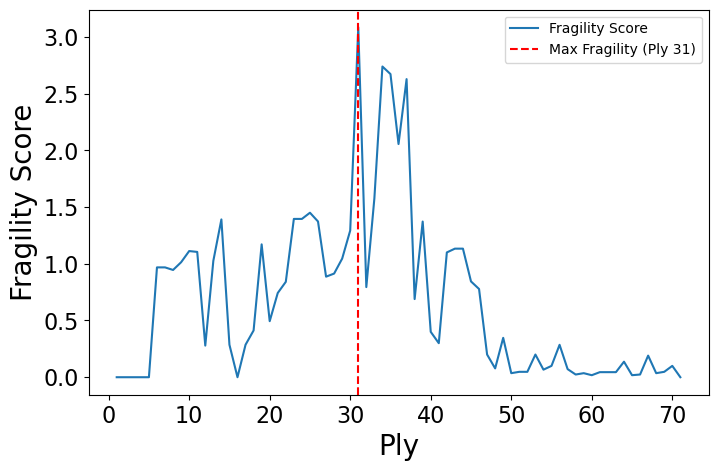

Displaying the state **after** the move causing maximum fragility:


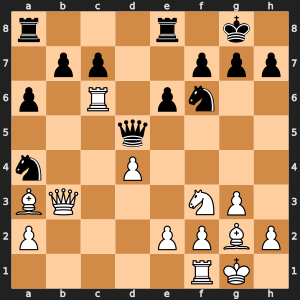

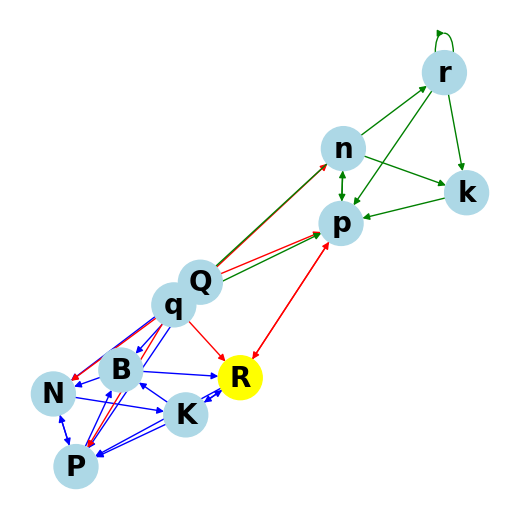

Processing file: ./data/test_folder1/rotlewi_rubinstein_1907.pgn
Maximum fragility occurs at ply: 21
Move at maximum fragility: f1d3
Piece that made the move: B
Key piece under attack: P
Fragility before the move: 1.5712121212121213
Fragility after the move: 2.046969696969697


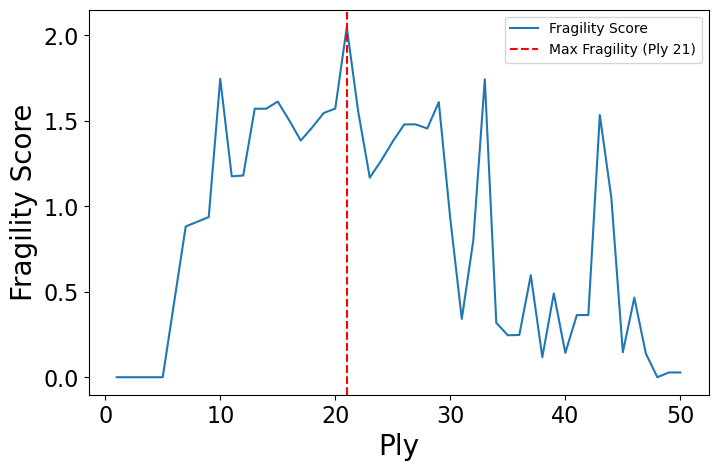

Displaying the state **after** the move causing maximum fragility:


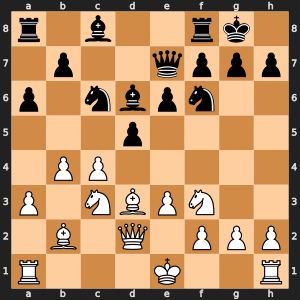

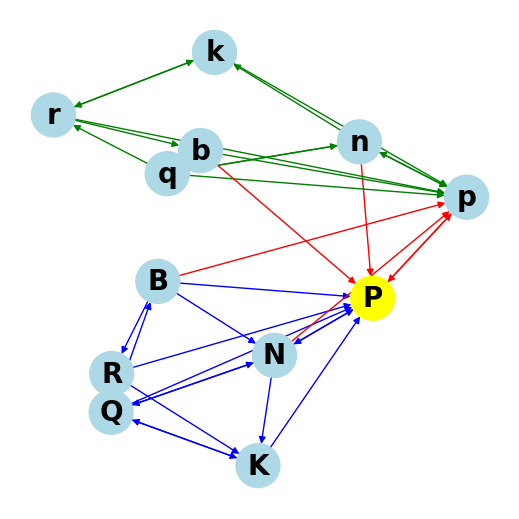

Processing file: ./data/test_folder1/byrne_fischer_1956.pgn
Maximum fragility occurs at ply: 29
Move at maximum fragility: f1c4
Piece that made the move: B
Key piece under attack: P
Fragility before the move: 1.6621212121212119
Fragility after the move: 2.227272727272727


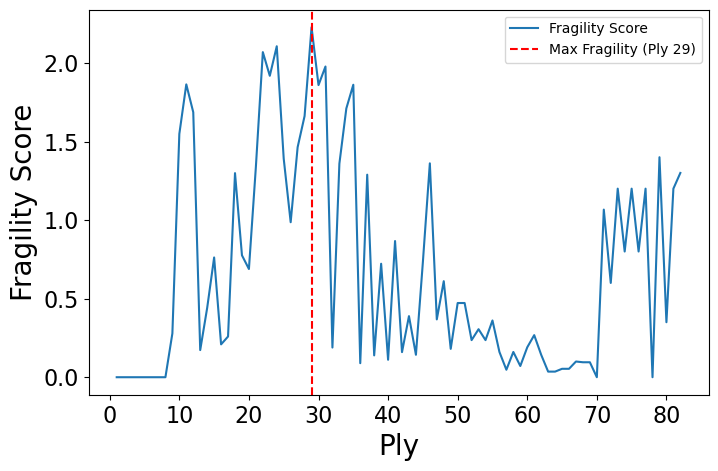

Displaying the state **after** the move causing maximum fragility:


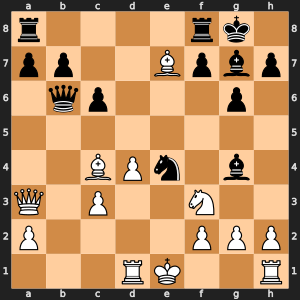

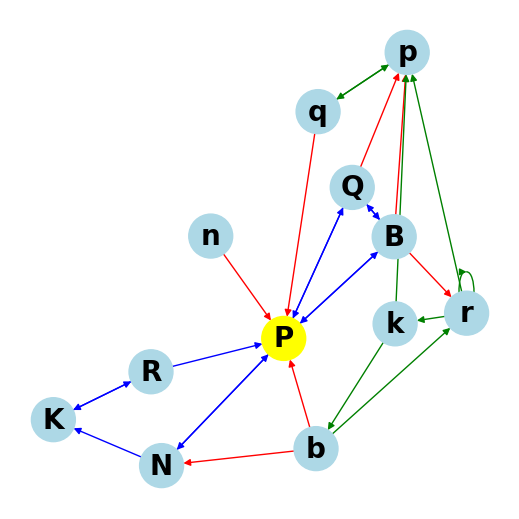

Processing file: ./data/test_folder1/morphy_chamouillet_allies_1858.pgn
Maximum fragility occurs at ply: 14
Move at maximum fragility: c7c5
Piece that made the move: p
Key piece under attack: P
Fragility before the move: 0.8863636363636362
Fragility after the move: 2.1136363636363633


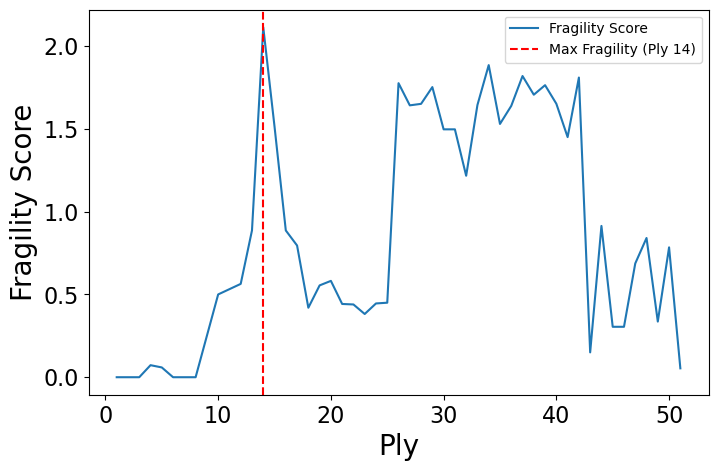

Displaying the state **after** the move causing maximum fragility:


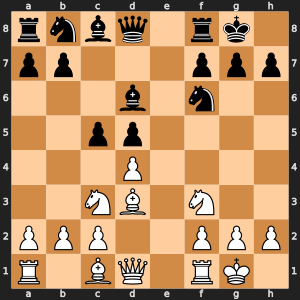

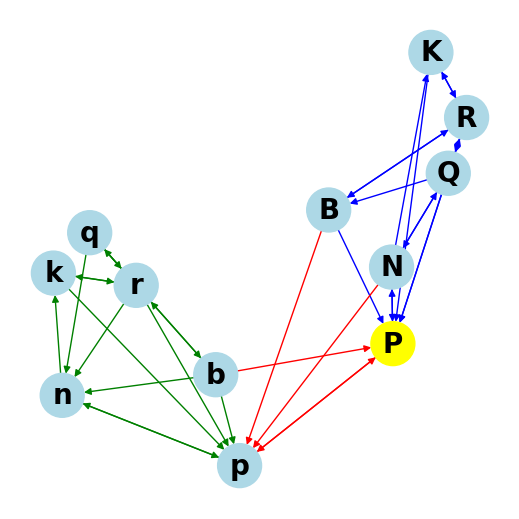

Processing file: ./data/test_folder1/botvinnik_makogonov_1943.pgn
Maximum fragility occurs at ply: 43
Move at maximum fragility: e1e6
Piece that made the move: R
Key piece under attack: R
Fragility before the move: 1.5553030303030302
Fragility after the move: 1.9924242424242422


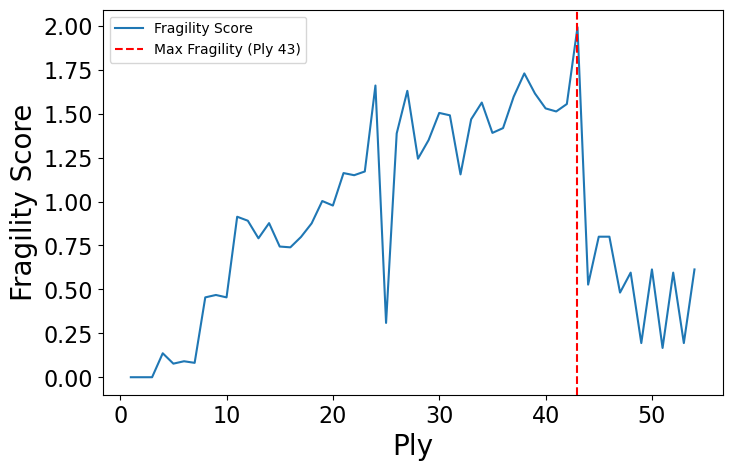

Displaying the state **after** the move causing maximum fragility:


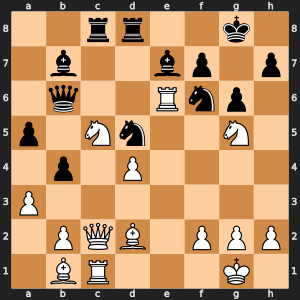

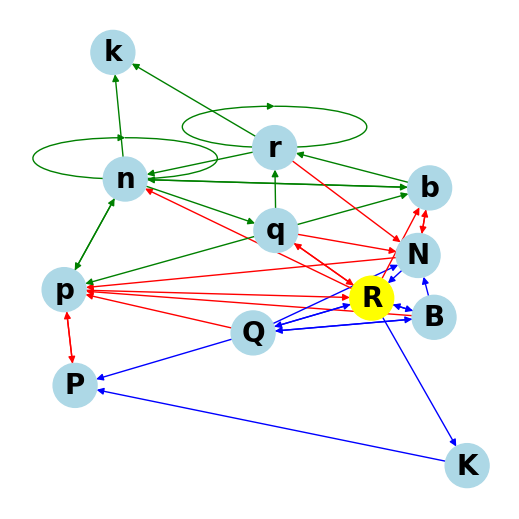

Processing file: ./data/test_folder1/geller_euwe_1953.pgn
Maximum fragility occurs at ply: 35
Move at maximum fragility: e4e5
Piece that made the move: P
Key piece under attack: P
Fragility before the move: 2.131818181818182
Fragility after the move: 2.6106060606060604


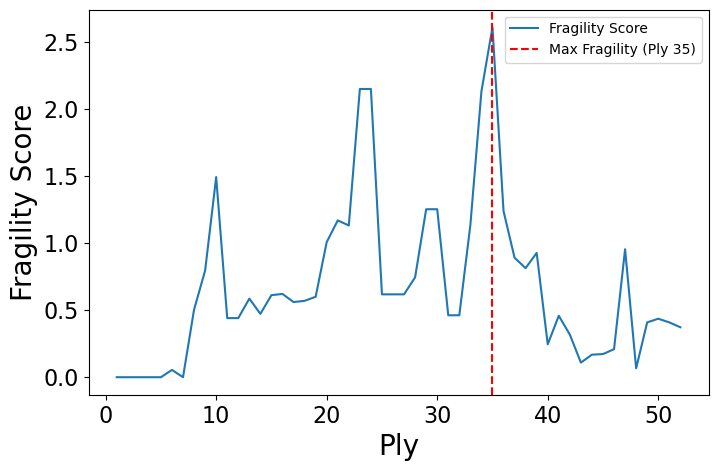

Displaying the state **after** the move causing maximum fragility:


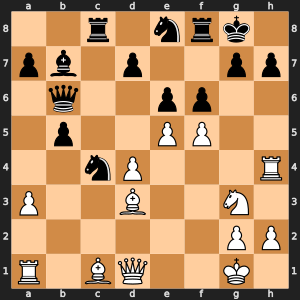

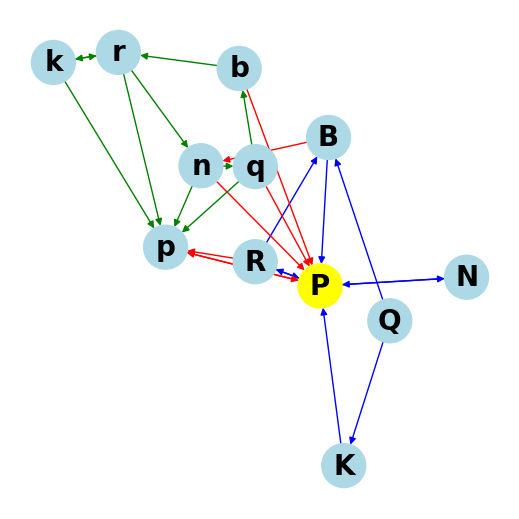

In [3]:
import chess
import chess.pgn
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import SVG, display
import chess.svg

# Function for computing the interaction graph for a given color, with pawn capturing rules applied
def compute_interactions_for_color(board, color_turn):
    G = nx.DiGraph()
    piece_positions = {square: board.piece_at(square) for square in chess.SQUARES if board.piece_at(square)}
    
    board_copy = board.copy()
    board_copy.turn = color_turn
    
    for square_a, piece_a in piece_positions.items():
        if piece_a.color == color_turn:
            for square_b, piece_b in piece_positions.items():
                if square_a != square_b:
                    # Defense link (same color)
                    if piece_a.color == piece_b.color:
                        board_copy.remove_piece_at(square_b)
                        if chess.Move(from_square=square_a, to_square=square_b) in board_copy.legal_moves:
                            G.add_edge(piece_a.symbol(), piece_b.symbol(), color='blue' if color_turn == chess.WHITE else 'green')
                        board_copy.set_piece_at(square_b, piece_b)
                    # Attack link (different color)
                    elif piece_a.color != piece_b.color:
                        # Special rule for pawns: can only capture diagonally if an enemy piece is present
                        if piece_a.piece_type == chess.PAWN:
                            if piece_b:  # Ensure that there's an enemy piece to capture
                                if chess.Move(from_square=square_a, to_square=square_b) in board_copy.legal_moves:
                                    G.add_edge(piece_a.symbol(), piece_b.symbol(), color='red')
                        else:  # For non-pawn pieces, follow the usual logic
                            if chess.Move(from_square=square_a, to_square=square_b) in board_copy.legal_moves:
                                G.add_edge(piece_a.symbol(), piece_b.symbol(), color='red')
    return G

# Function to compute the full interaction graph
def compute_full_interaction_graph(board):
    G_white = compute_interactions_for_color(board, chess.WHITE)
    G_black = compute_interactions_for_color(board, chess.BLACK)
    G_full = nx.compose(G_white, G_black)
    return G_full

# Function to check if a piece is under attack
def is_piece_under_attack(board, square, color):
    return bool(list(board.attackers(not color, square)))

# Compute Betweenness Centrality for each piece
def compute_betweenness_centrality(G):
    return nx.betweenness_centrality(G, normalized=True)

# Function to compute fragility score for a given color and determine the key piece under attack
def compute_fragility_score(board, G, color):
    betweenness = compute_betweenness_centrality(G)
    fragility_score = 0
    max_betweenness_under_attack = 0
    key_piece_under_attack = None

    # Iterate over pieces and compute fragility score
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece and piece.color == color:
            under_attack = is_piece_under_attack(board, square, color)
            piece_symbol = piece.symbol()
            if under_attack and betweenness.get(piece_symbol, 0) > max_betweenness_under_attack:
                max_betweenness_under_attack = betweenness[piece_symbol]
                key_piece_under_attack = piece_symbol
            fragility_score += betweenness.get(piece_symbol, 0) * under_attack

    return fragility_score, key_piece_under_attack

# Function to process a single game and compute fragility score over time
def process_single_game(game):
    board = game.board()
    fragility_over_time = []
    board_states_before_move = []  # Store the board state **before** the move at each ply
    board_states_after_move = []   # Store the board state **after** the move at each ply
    moves = []  # To store the moves made
    pieces_making_moves = []  # To store the piece making each move
    key_pieces_under_attack = []  # To store the key piece under attack for each ply

    for move in game.mainline_moves():
        # Store the piece making the move before pushing the move
        piece_making_move = board.piece_at(move.from_square)
        piece_symbol = piece_making_move.symbol() if piece_making_move else None
        pieces_making_moves.append(piece_symbol)  # Store the piece symbol

        board_states_before_move.append(board.copy())  # Store board **before** the move
        board.push(move)  # Make the move
        board_states_after_move.append(board.copy())   # Store board **after** the move
        moves.append(move)  # Store the move

        # Compute the full interaction graph
        G_full = compute_full_interaction_graph(board)

        # Compute fragility score for white and black and determine the key piece under attack
        white_fragility, white_key_piece = compute_fragility_score(board, G_full, chess.WHITE)
        black_fragility, black_key_piece = compute_fragility_score(board, G_full, chess.BLACK)
        total_fragility = white_fragility + black_fragility

        fragility_over_time.append(total_fragility)
        key_pieces_under_attack.append(white_key_piece if white_key_piece else black_key_piece)

    # Find the ply with maximum fragility
    max_fragility_ply = np.argmax(fragility_over_time) + 1  # Adjust to match 1-based ply numbering
    
    # Get the move at the maximum fragility ply
    move_at_max_fragility = moves[max_fragility_ply - 1] if max_fragility_ply - 1 < len(moves) else None

    # Get the piece that made the move leading to maximum fragility
    piece_at_max_fragility = pieces_making_moves[max_fragility_ply - 1] if max_fragility_ply - 1 < len(pieces_making_moves) else None

    # Get the key piece under attack at maximum fragility
    key_piece_at_max_fragility = key_pieces_under_attack[max_fragility_ply - 1] if max_fragility_ply - 1 < len(key_pieces_under_attack) else None

    # Calculate fragility before and after the move at the maximum fragility ply
    fragility_before = fragility_over_time[max_fragility_ply - 2] if max_fragility_ply - 1 > 0 else None
    fragility_after = fragility_over_time[max_fragility_ply - 1]

    # Return both board states (before and after) and the interaction graph for that state
    return (fragility_over_time, board_states_before_move[max_fragility_ply - 1], board_states_after_move[max_fragility_ply - 1],
            max_fragility_ply, piece_at_max_fragility, move_at_max_fragility, key_piece_at_max_fragility, 
            fragility_before, fragility_after, moves[:max_fragility_ply])

# Function to plot the fragility score over time (with correct ply numbering starting from 1)
def plot_fragility_over_time(fragility_over_time, max_fragility_ply):
    plt.figure(figsize=(8, 5))
    x = np.arange(1, len(fragility_over_time) + 1)  # Adjust ply numbers to start at 1
    plt.plot(x, fragility_over_time, label='Fragility Score')
    plt.axvline(x=max_fragility_ply, color='r', linestyle='--', label=f'Max Fragility (Ply {max_fragility_ply})')
    plt.xlabel('Ply', fontsize=20)
    plt.ylabel('Fragility Score', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend()
    plt.show()

# Function to display the board and interaction graph, highlighting the key piece under attack
def display_board_and_interaction_graph(board, G_full, move_at_max_fragility, key_piece_at_max_fragility, position_type="before"):
    # Show the chessboard image as an SVG
    svg_image = chess.svg.board(board=board, size=300)
    display(SVG(svg_image))  # Display the board

    # Plot the interaction graph
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G_full)
    colors = [G_full[u][v]['color'] for u, v in G_full.edges]
    node_colors = ['yellow' if node == key_piece_at_max_fragility else 'lightblue' for node in G_full.nodes]
    nx.draw(G_full, pos, edge_color=colors, with_labels=True, node_size=1000, node_color=node_colors, font_size=20, font_weight='bold')
    plt.show()

# Main function to process all files in the folder
def process_pgn_files_in_folder(folder_path):
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".pgn"):
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing file: {file_path}")

            # Open and read the PGN file
            with open(file_path) as f:
                game = chess.pgn.read_game(f)
                if game is None:
                    print(f"No game found in file: {file_name}")
                    continue

                # Process the game and compute fragility
                (fragility_over_time, board_before_move, board_after_move, 
                 max_fragility_ply, piece_at_max_fragility, move_at_max_fragility, 
                 key_piece_at_max_fragility, fragility_before, fragility_after, moves_until_max_fragility) = process_single_game(game)

                # Print the move and fragility before and after the move at maximum fragility
                print(f"Maximum fragility occurs at ply: {max_fragility_ply}")
                print(f"Move at maximum fragility: {move_at_max_fragility}")
                print(f"Piece that made the move: {piece_at_max_fragility}")
                print(f"Key piece under attack: {key_piece_at_max_fragility}")
                print(f"Fragility before the move: {fragility_before}")
                print(f"Fragility after the move: {fragility_after}")

                # Print the list of moves up to the maximum fragility
                #print("\nList of moves and corresponding ply leading to maximum fragility:")
                #for ply, move in enumerate(moves_until_max_fragility, start=1):
                #    print(f"Ply {ply}: {move}")

                # Plot the fragility score over time
                plot_fragility_over_time(fragility_over_time, max_fragility_ply)

                # Compute the interaction graph **before** and **after** the move at the maximum fragility ply
                G_full_before = compute_full_interaction_graph(board_before_move)
                G_full_after = compute_full_interaction_graph(board_after_move)

                ## Display the board and interaction graph before the move at maximum fragility
                #print("Displaying the state **before** the move causing maximum fragility:")
                #display_board_and_interaction_graph(board_before_move, G_full_before, move_at_max_fragility, key_piece_at_max_fragility, position_type="before")

                # Display the board and interaction graph after the move at maximum fragility
                print("Displaying the state **after** the move causing maximum fragility:")
                display_board_and_interaction_graph(board_after_move, G_full_after, move_at_max_fragility, key_piece_at_max_fragility, position_type="after")

# Path to the folder containing PGN files
folder_path = './data/test_folder1'
process_pgn_files_in_folder(folder_path)


------------------------------------------ end of working zone 